In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import copy

In [4]:
img = Image.open('Lenna.png').convert('L')
h, w = img.height , img.width # wysokość i szerokosc obrazu 

M = np.array(list(img.getdata(band = 0)), float)
M.shape = (h, w)
M = np.matrix(M)

In [5]:
U, sigma, V = np.linalg.svd(M) #obliczenie SVD

In [6]:
def reconstructImage(k):
    return np.matrix(U[:, :k]) @ np.diag(sigma[:k]) @ np.matrix(V[:k, :])

In [7]:
def showImagesWithDiff(imgOriginal, imgCompressed, k , eps):
    fig = plt.figure(figsize=(10, 10))
    
    #orginał
    a = fig.add_subplot(1, 3, 1)
    a.set_title('Original')
    a.axis('off')
    plt.imshow(imgOriginal,cmap='gray')
    
    #po kompresji
    b = fig.add_subplot(1, 3, 2)
    titleB = "Compression k = %s" % k
    b.set_title(titleB)
    b.axis('off')
    plt.imshow(imgCompressed,cmap='gray')
    
    #różnica
    c = fig.add_subplot(1, 3, 3)
    c.set_title('Difference')
    c.axis('off')
    
    imgCopy = imgCompressed.copy() #kopiujemy obraz po kompresji
    imgCopy[np.abs(imgCompressed - imgOriginal) > eps] = np.nan #piksele ktore sie roznia zmieniamy na NaN  
    xcm = copy.copy(plt.cm.gray) #kopiujemy mape kolorów
    xcm.set_bad(color='red', alpha=0.5) #ustawiamy kolor 'zlych pikseli'
    plt.imshow(imgCopy, cmap=xcm)
    
    
    fileName = "Compression%s.png" % k
    fig.savefig(fileName)

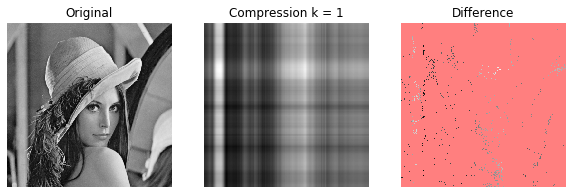

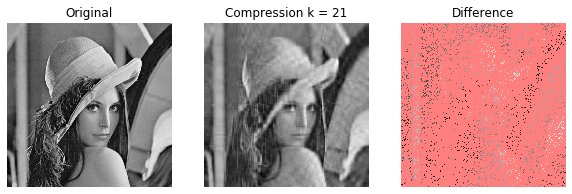

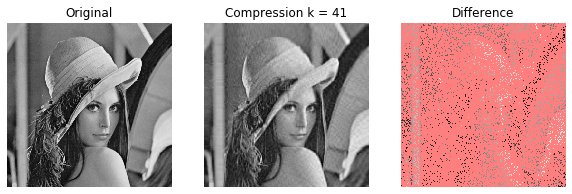

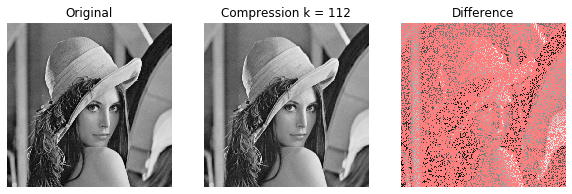

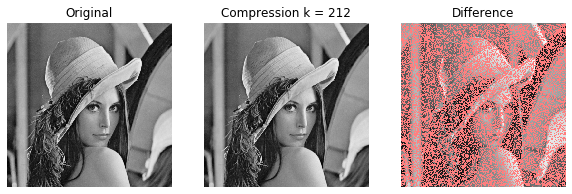

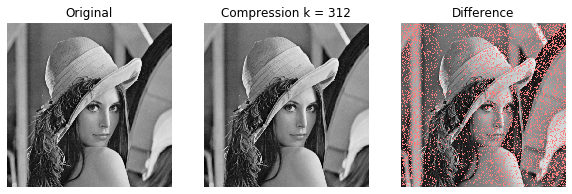

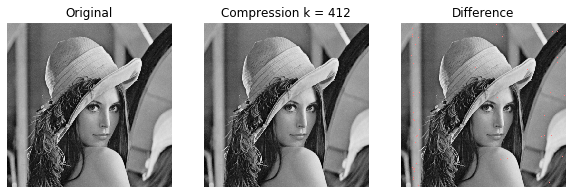

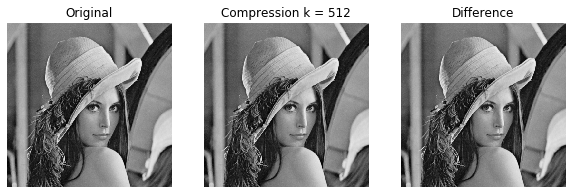

In [8]:
eps = 1

for k in range (1,61,20):
    showImagesWithDiff(M,reconstructImage(k),k,eps)
    
for k in range (112,513,100):
    showImagesWithDiff(M,reconstructImage(k),k,eps) 